In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import librosa
import librosa.display
import IPython.display as ipd 
import numba

In [2]:
numba.__version__

'0.53.0'

In [3]:
np.__version__

'1.19.5'

In [4]:
filename = "./-6_dB_fan/fan/id_00/abnormal/00000000.wav"
filename_norm = "./-6_dB_fan/fan/id_00/normal/00000000.wav"

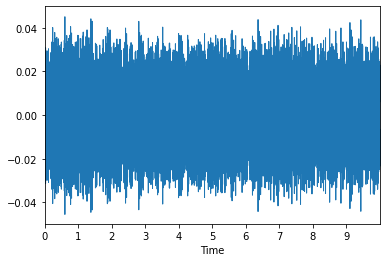

In [5]:
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr = sample_rate)

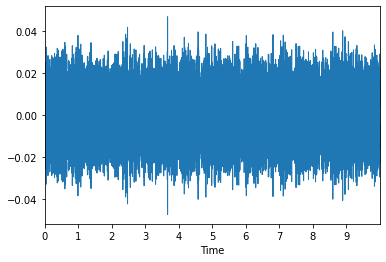

In [6]:
data_norm, sample_rate_norm = librosa.load(filename_norm)
librosa.display.waveplot(data_norm, sr = sample_rate_norm)

In [7]:
plt.figure(figsize = (14,5))
ipd.Audio(filename)

<Figure size 1008x360 with 0 Axes>

In [8]:
plt.figure(figsize = (14,5))
ipd.Audio(filename_norm)

<Figure size 1008x360 with 0 Axes>

In [9]:
print(data)
print(sample_rate)

[-0.01110327 -0.01455556 -0.01233269 ...  0.01123148  0.0137985
  0.00964135]
22050


In [10]:
data.shape

(220500,)

In [11]:
# Extract mfccs
mfccs = librosa.feature.mfcc(data, n_mfcc = 13, sr = sample_rate)

In [12]:
mfccs.shape

(13, 431)

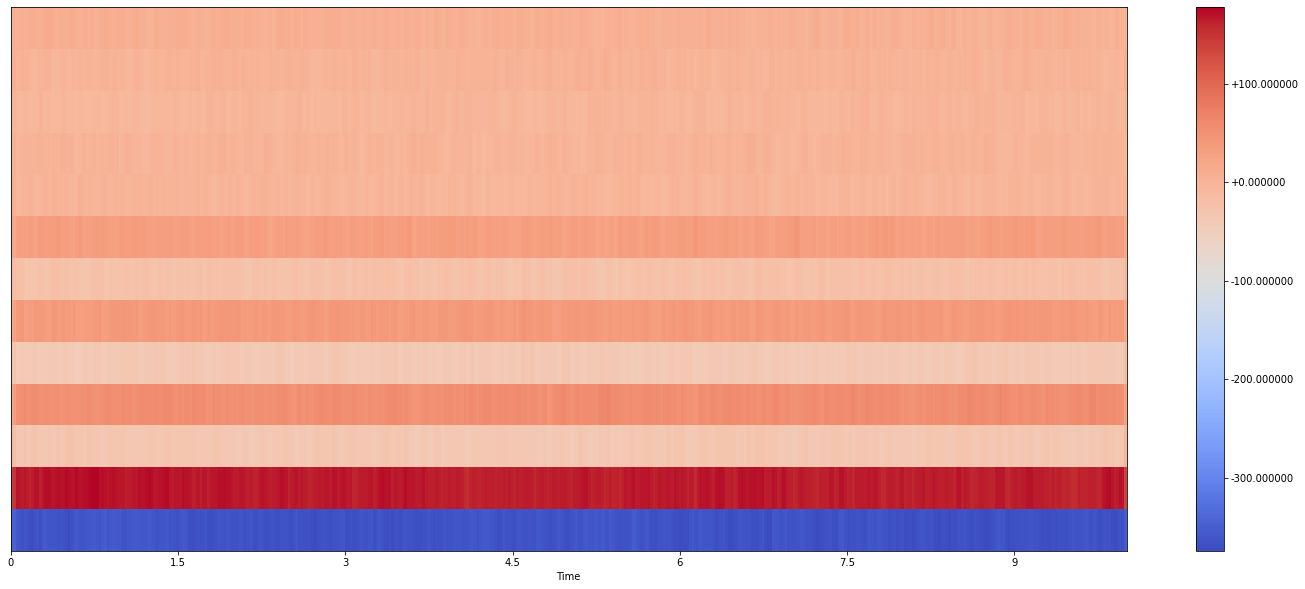

In [13]:
# Visualize mfccs
plt.figure(figsize = (25,10))
librosa.display.specshow(mfccs, x_axis = 'time', sr = sample_rate)
plt.colorbar(format = '%+2f')
plt.show()

In [14]:
# Calculate detlta and delta2 to mfccs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [15]:
delta_mfccs.shape

(13, 431)

In [16]:
delta2_mfccs.shape

(13, 431)

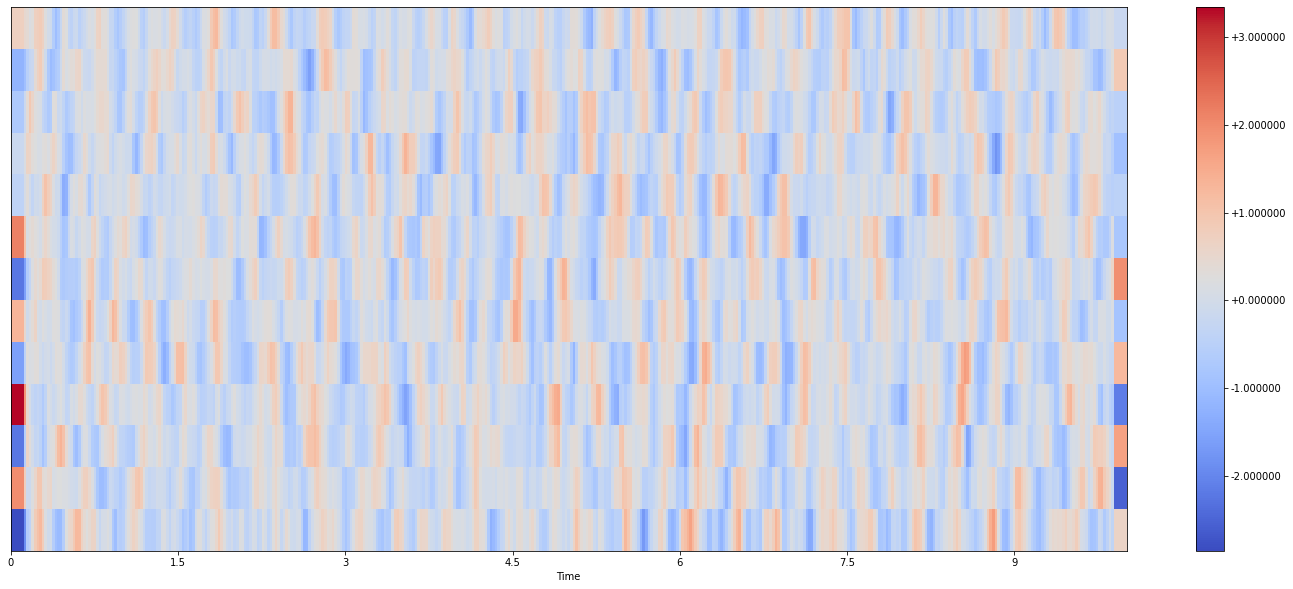

In [17]:
# Visualize delta_mfccs
plt.figure(figsize = (25,10))
librosa.display.specshow(delta_mfccs, x_axis = 'time', sr = sample_rate)
plt.colorbar(format = '%+2f')
plt.show()

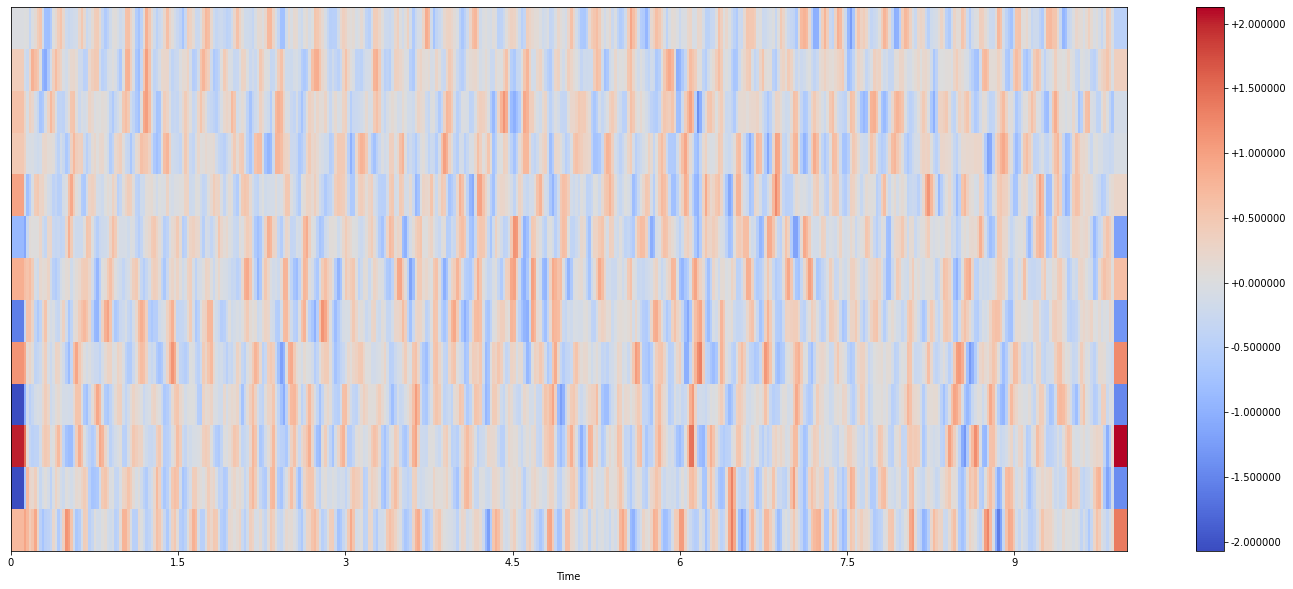

In [18]:
# Visualize delta2_mfccs
plt.figure(figsize = (25,10))
librosa.display.specshow(delta2_mfccs, x_axis = 'time', sr = sample_rate)
plt.colorbar(format = '%+2f')
plt.show()

In [19]:
comprehensive_mfccs = np.concatenate([mfccs,delta_mfccs, delta2_mfccs])

In [20]:
comprehensive_mfccs.shape

(39, 431)

## Mel filter banks

In [24]:
# load audio files with Librosa
scale, sr = librosa. load(filename)
scale_norm, sr_norm = librosa. load(filename_norm)

In [25]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [26]:
filter_banks.shape

(10, 1025)

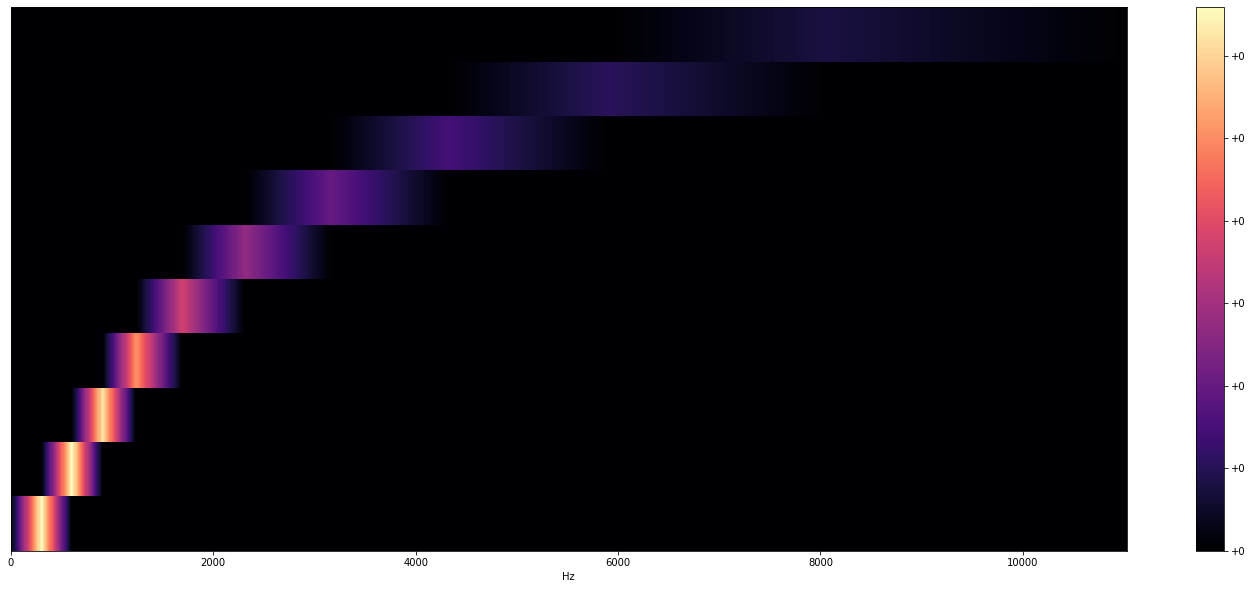

In [28]:
plt.figure(figsize =(25,10))
librosa.display.specshow(filter_banks, sr = sr, x_axis ='linear')
plt.colorbar(format='%+2.f')

## Extracting Mel Spectrograms

In [33]:
mel_spectrogram = librosa.feature.melspectrogram(scale, sr = sr, n_fft = 2048, hop_length = 512, n_mels = 90)

In [34]:
mel_spectrogram.shape

(90, 431)

In [35]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

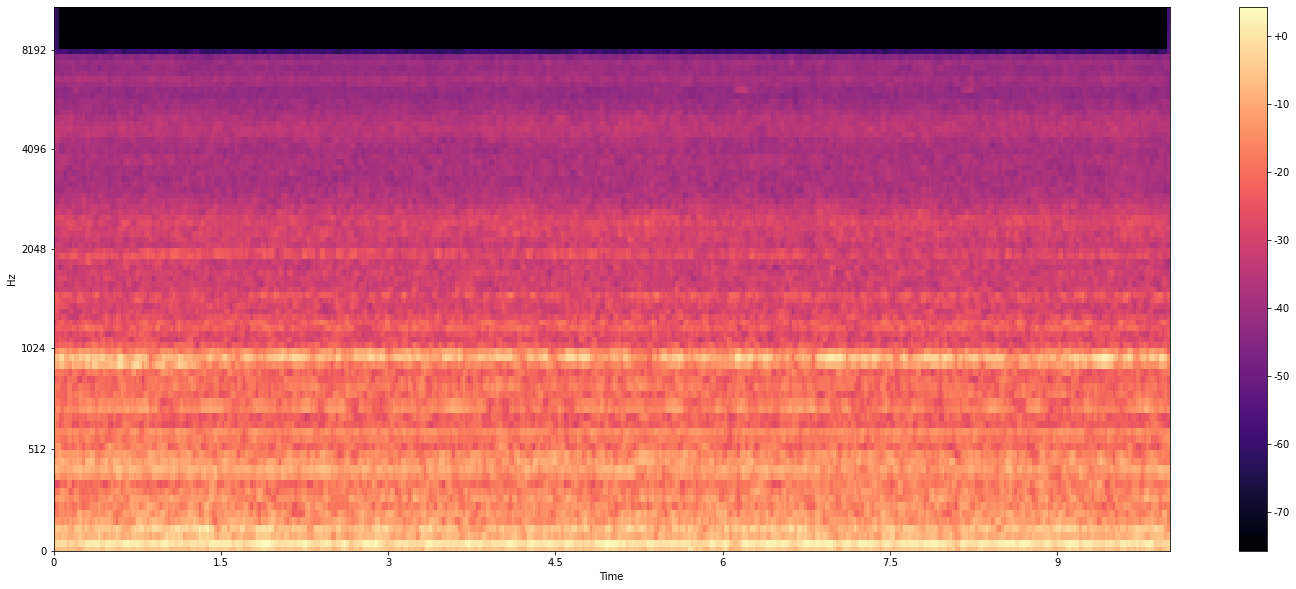

In [36]:
plt.figure(figsize = (25,10))
librosa.display.specshow(log_mel_spectrogram, x_axis = 'time', y_axis = 'mel', sr=sr)
plt.colorbar(format = '%+2.f')
plt.show()